<a href="https://colab.research.google.com/github/nechebarrena/HOML/blob/main/HOML_cap_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPITULO 8 - HANDS ON MACHINE LEARNING**
## **Reducción de dimensionalidad**

Existen muchos problemas donde contamos con enormes cantidades de atributos. En general, tener muchos atributos, vuelve mas complejo al problema y uno muchas veces necesita simplificarlo. Una forma de hacer esto es reducir la cantidad de atributos que nuestro modelo va a procesar, para eso existen diversas técnicas de reducción de la dimensionalidad. Además, estas mismas técnicas muchas veces se utilizan con el objetivo de ayudar a la visualización de ciertos aspectos del problema. Para estos dos objetivos el libro propone tratar las tres técnicas princiapes, PCA, Kernel PCA, y LLE.



El principal problema de los sistemas con un gran número de dimensiones es que conforme aumenta la cantidad de estas, aumenta la necesidad de datos de entrenamiento para llenar el espacio de fases. Esto se debe a que, para simplificar, al aumentar la cantidad de dimensiones aumenta el volumen del espacio y por lo tanto la cantidad de puntos que lo llenan. Esto a su vez tiene otra consecuencia un poco menos intuitiva, cuanto más grande es la cantidad de dimensiones los puntos tienden a concentrarse más sobre la superficie del volumen. Esto significa que en general la distancia entre 2 puntos tiende a ser mayor y por lo tanto, cuando entrenemos un modelo que haga una interpolación entre ambos será menos preciso. 

### **Métodos principales** 

Existen 2 metodos que son los principales a la hora de implementar una reducción de dimensionalidad que vamos a ver a continuación:

#### **Proyección**

Muchas veces los datos experimentales con los que contamos pueden ser proyectados en subespacios del espacio original. Esta proyección implica perder alguna dimensión original del problema, o sea, perder información. Sin embargo, uno puede buscar cuál es el subespacio que permite reducir la dimensión minimizando la pérdida de información. Para eso debemos buscar cuál es este subespacio "que se parece" a los datos.

En las figuras $8.2$ y $8.3$ del libro se muestra un ejemplo de esto que deja bastante clara esta situación y lo que se busca.

#### **Aprendizaje con Manifolds**

Un _d-manifold_ es una superficie "enrollada" en un espacio de _d_ dimensiones dentro de un espacio mayor de _n_ dimensiones. Esto que suena difícil de explicar es muy fácil de ver. En la figura $8.4$ del libro se muestra un ejemplo muy claro. Se puede ver una nube de puntos en _3-D_ que sin embargo puede ser "desenrrollada" en un plano _2-D_.

La hipótesis detrás de estos métodos consta en general de 2 partes. La primera es la que ya mencionamos, que los datos pueden expresarse en un espacio menor con una pérdida muy chica de información. La segunda parte de la hipótesis es que uno luego puede realizar una tarea posterior (clasificación, regresión, etc) sobre este nuevo espacio de forma más sencilla. Esta segunda hipótesis no siempre es cierta. La figura $8.6$ del libro ejemplifica esto con un conjunto de datos donde una tarea de clasificación resulta más "sencilla" sobre el espacio original que sobre el espacio reducido.

Ahora que vimos por arriba la idea general de la reducción de dimensionalidad veamos algunos de los métodos más utilizados.



### **PCA**

El método de análisis de componentes principales (PCA en inglés) es el más utilizado y común al día de hoy. La idea de este algortimo es, tal como explicamos inicialmente, buscar el subespacio que más se parece a los datos y proyectar éstos sobre él. 

#### **Conservando la varianza**

El primer paso del método es encontrar cuál es el hiperplano donde se puedan proyectar los datos con la menor pérdida de información posible. Para eso vamos a buscar un hiperplano donde, luego de proyectar, nos quedemos con la máxima varianza posible de la original.

,X,Y,X_p,Y_p
0,93.596927,-0.792803,66.743618,65.622426
1,-18.809711,-1.836309,-12.002008,-14.598941
2,32.659349,-1.653395,24.262774,21.924520
3,35.983463,-1.814683,26.727325,24.160976
4,34.353829,-0.313664,24.513619,24.070032


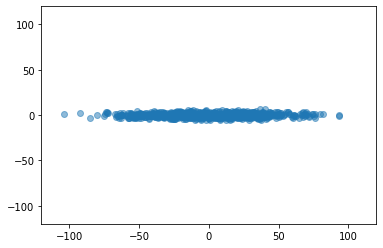

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

angulo = 0.25*np.pi

puntos = pd.DataFrame()


mu_x = 0
sigma_x = 30
mu_y = 0
sigma_y = 2


x = np.random.normal(mu_x, sigma_x, 1000)
y = np.random.normal(mu_y, sigma_y, 1000)
puntos['X'] = x
puntos['Y'] = y


puntos['X_p'] = puntos.apply(lambda row: np.cos(angulo)*row['X'] - np.sin(angulo)*row['Y'] , axis=1)
puntos['Y_p'] = puntos.apply(lambda row: np.sin(angulo)*row['X'] + np.cos(angulo)*row['Y'] , axis=1)


plt.scatter(puntos['X'],puntos['Y'],alpha=0.5)
#plt.scatter(puntos['X_p'],puntos['Y_p'],alpha=0.5)
plt.xlim(-120, 120)
plt.ylim(-120, 120)
puntos.head()

Para encontrar el hiperplano que maximiza la varianza de los datos se puede usar el método de SVD para descomponer la matriz original de los datos $\mathbf{X}$ en tres matrices $\mathbf{U\Sigma}$$\mathbf{V}^\intercal$. La matriz $\mathbf{V}$ contiene los vectores que describen el hiperplano buscado.
Acá el libro no justifica por qué esto es así, solo lo cuenta. Quizás valga la pena hacer el ejercicio de ver cómo funciona esta descomposición y por qué da esto.

Ahora vamos a tratar de hacer esto utilizando un método de numpy para realizar una descomposición SVD.


[-0.7056205  -0.70858994] [-0.70858994  0.7056205 ]


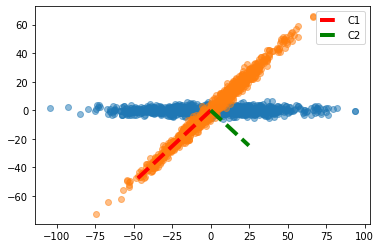

In [ ]:
puntos_originales = pd.DataFrame()
puntos_originales['X'] = puntos['X_p']
puntos_originales['Y'] = puntos['Y_p']
U, s, Vt = np.linalg.svd(puntos_originales)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
print(c1,c2)

plt.scatter(puntos['X'],puntos['Y'],alpha=0.5)
plt.scatter(puntos['X_p'],puntos['Y_p'],alpha=0.5)
plt.plot([0,70*c1[0]],[0,70*c1[1]],color="red",linewidth=4,label="C1",linestyle="--")
plt.plot([0,-35*c2[0]],[0,-35*c2[1]],color="green",linewidth=4,label="C2",linestyle="--")
plt.legend()

Para poder hacer uso de la descomposición SVD debemos tener los datos centrados en el origen de coordenadas. Vamos a ver cuando usemos Sklearn que el método PCA se encarga por nosotros de hacer la traslación si fuese necesaria.

Una vez que encontramos el hiperplano lo que debemos hacer es proyectar los datos sobre él. En este caso podemos elegir sobre cuántas dimensiones proyectamos, con lo cual estamos decidiendo cuántas dimensiones queremos que tenga nuestro set de datos. En el caso ejemplificado con datos en dos dimensiones solo podemos tirar una (C2) y quedarnos con la coordenada C1 que es la que más varianza conserva. Para realizar la proyección debemos hacer:

$\mathbf{X_{d-proy}} = \mathbf{XW_d}$

Donde $\mathbf{X_{d-proy}}$ es el nuevo dataset reducido, $\mathbf{X}$ es el dataset original y $\mathbf{W_d}$ es la matriz que contiene los $d$ primeros vectores de $\mathbf{V}$.

(-120.0, 120.0)

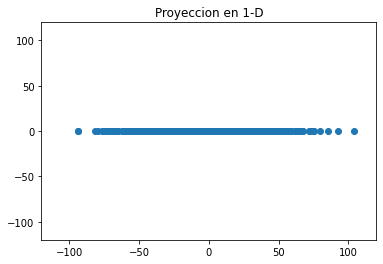

In [ ]:
puntos_reducidos =puntos_originales.dot(c1)
plt.scatter(puntos_reducidos,np.zeros(len(puntos_reducidos)))
plt.title("Proyeccion en 1-D")
plt.xlim(-120, 120)
plt.ylim(-120, 120)

#### **Usando SkLearn**

Por suerte Sklearn una vez más nos ofrece una solución empaquetada para poder implementar el metodo PCA sin realizar todos estos pasos. El método se encarga de centrar los datos y realizar la proyección al número de dimensiones que nosotros seleccionemos.


Text(0.5, 1.0, 'Proyeccion en 1-D utilizando SKlearn')

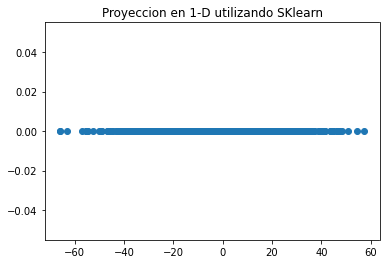

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
puntos_reducidos_skl = pca.fit_transform(puntos_originales)
plt.scatter(puntos_reducidos,np.zeros(len(puntos_reducidos_skl)))
plt.title("Proyeccion en 1-D utilizando SKlearn")

Si queremos saber cuáles son los vectores de la descomposición $\mathbf{W_d}$ podemos buscarlos en los atributos del objeto.

In [ ]:
print("Direccion encontrada con SkLearn = ",pca.components_.T[:, 0])
print("Direccion encontrada con SVD = ", c1)

Direccion encontrada con SkLearn =  [0.70757572 0.70663754]
Direccion encontrada con SVD =  [-0.70750914 -0.7067042 ]


Porcentaje de varianza

In [ ]:
var_p = pca.explained_variance_ratio_
print(var_p)

[0.99122308 0.00877692]


#### **Eligiendo la cantidad de dimensiones**

En general existen dos criterios distintos para la elección de la cantidad de dimensiones. El primero es cuando deseamos visualizar algo. En este caso estamos obligados a quedarnos con 2 o 3 dimensiones independientemente de las dimensiones originales. 

El segundo caso es aquel donde fijamos un umbral de varianza mínima que deseamos capturar. Este umbral de varianza mínima, por ejemplo $80\%$, nos indica que debemos incluir todas las dimensiones necesarias para llegar a contener el $80\%$ de la varianza total del problema.

#### **Compresión con PCA**

Al reducir la cantidad de dimensiones utilizada lo que estamos haciendo es reducir la cantidad de información y por lo tanto comprimiendo los datos originales. Si a los datos reducidos les aplicamos la transformación inversa y volvemos a la cantidad de dimensiones originales podemos recuperar un dataset muy parecido al original, pero en el proceso logramos reducir mucho su tamaño. El libro muestra como ejemplo el dataset de MINST. Para efectuar la transformación inversa debemos hacer:
$\mathbf{X_{recuperado}}=\mathbf{X_{d-proy}}\mathbf{W_{d}^\intercal}$

#### **Métodos incrementales y aleatorios**

Sobre el método original existen variaciones según ciertas necesidades. El método aleatorio utiliza un algoritmo estocástico para encontrar las direcciones correctas, este método es más rápido cuando la cantidad de dimensiones es menor a la cantidad de datos. Otro método es el incremental, que lo que hace es ir calculando las dimensiones adecuadas con batches de datos y no con todo el dataset original. Esto resulve el problema de que el dataset original sea muy grande y no entre u ocupe mucha memoria.


### **Kernel PCA**

En el capitulo 5 utilizamos el truco del Kernel para simplificar (o permitir) el problema de clasificación en espacios complejos. De igual forma se puede utilizar este método para tratar de realizar PCA sobre espacios que tengan características no lineales.

Para ver esto vamos a utilizar el dataset _swiss roll_.


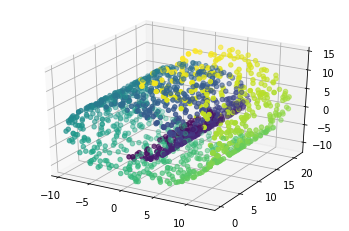

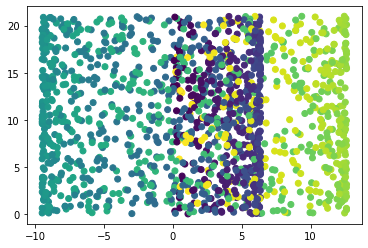

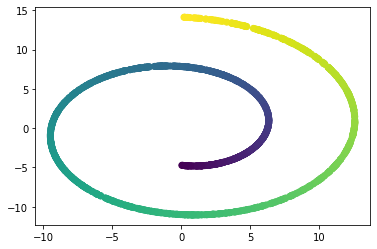

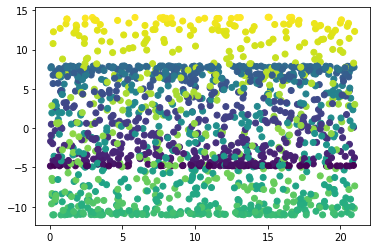

In [ ]:
from sklearn import datasets
X, color = datasets.make_swiss_roll(n_samples=1500)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2],c=color)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1],c=color)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 2],c=color)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:, 1], X[:, 2],c=color)


Vamos a utilizar distintos kernel para ver cómo quedan las componentes.

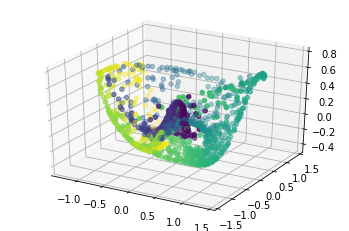

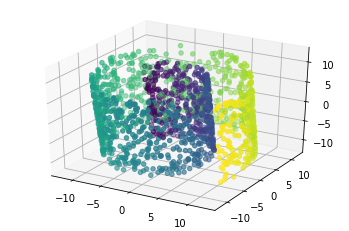

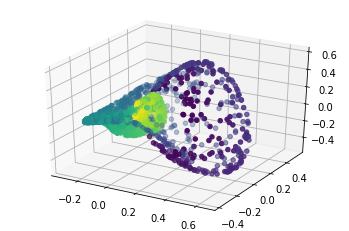

In [ ]:
from sklearn.decomposition import KernelPCA
kernels = ["sigmoid","linear","rbf"]

j = 1
for kernel in kernels:
  rbf_pca = KernelPCA(n_components = 3, kernel=kernel, gamma=0.04)
  X_reduced = rbf_pca.fit_transform(X)
  fig =plt.figure()
  ax = fig.add_subplot( projection='3d')
  ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],c=color)
  j = j +1

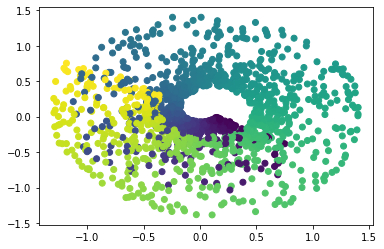

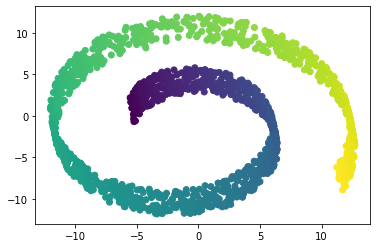

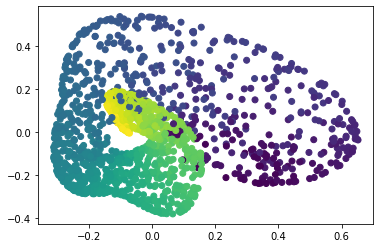

In [ ]:
from sklearn.decomposition import KernelPCA
kernels = ["sigmoid","linear","rbf"]

j = 1
for kernel in kernels:
  rbf_pca = KernelPCA(n_components = 2, kernel=kernel, gamma=0.04)
  X_reduced = rbf_pca.fit_transform(X)
  fig =plt.figure()
  ax = fig.add_subplot( )
  ax.scatter(X_reduced[:, 0], X_reduced[:, 1],c=color)
  j = j +1

La pregunta es cómo elegir el kernel utilizado y los parámetros que este pueda tener. El libro propone introducir esta elección y el conjunto de parámetros como hiperparámetros de un modelo donde estos se van a entrenar por medio un gridsearch. La métrica que se puede minimizar en este caso es el error cometido en la reconstrucción tal como vimos anteriormente. Minimizar este error de alguna forma nos da a entender que el espacio encontrado es el óptimo. 

Hay que tener en cuenta que esto no necesariamente significa que nuestro modelo posterior (una regresión, una clasificación o lo que fuese) vaya a funcionar mejor.

### **LLE**

Otro método bastante utilizado es el conocido como _Locally Linear Embedding_ o LLE. El principio de funcionamiento del método es totalmente distinto al propuesto por PCA, ya que este no utiliza proyecciones sino que calcula relaciones entre vecinos y luego busca un nuevo espacio donde se mantengan estas relaciones. Este tipo de métodos parece ser especialmente útil cuando tenemos _d-manifolds_ y cuando estos no son muy ruidosos.

Veamos como aplicarlo utilizando Sklearn y luego vamos a ver en mayor profundidad el funcionamiento del método.



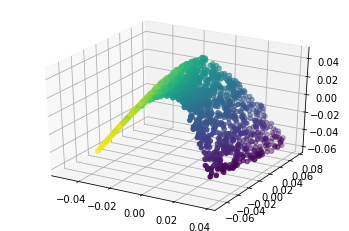

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=3, n_neighbors=10)
X_reduced_lle = lle.fit_transform(X)
fig =plt.figure()
ax = fig.add_subplot(projection='3d' )
ax.scatter(X_reduced_lle[:, 0], X_reduced_lle[:, 1],X_reduced_lle[:, 2],c=color)
 




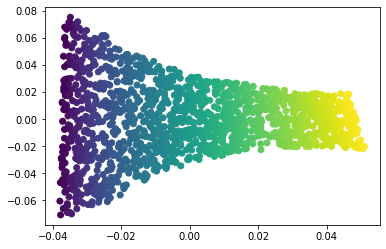

In [ ]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced_lle = lle.fit_transform(X)
fig =plt.figure()
ax = fig.add_subplot( )
ax.scatter(X_reduced_lle[:, 0], X_reduced_lle[:, 1],c=color)

Puede verse que el método "desenrrollo" los puntos en una sábana $2-D$. Sin embargo también puede verse que el margen izquierdo de los puntos fue algo estirado mientras que el derecho, por el contrario, fue reducido.

¿Cómo funciona el método entonces?

Para cada instancia $\mathbf{x^i}$ el método identifica los $k$ vecinos más cercanos. Una vez que identificó los $k$ vecinos intenta realizar una descripción lineal de $\mathbf{x^i}$ en función de ellos. Para eso utiliza una serie de pesos variables $w_{i,j}$, o sea:

$\mathbf{x^i_{reco}} = \sum_{j=1}^{k}w_{i,j}\mathbf{x^j}$

En definitiva tengo $k$ pesos $w_{i,j}$ para cada instancia reconstruida $\mathbf{x^i_{reco}}$. Esto mismo lo repito para todas las instancias, con lo cual puedo escribir que la matriz de pesos $\mathbf{\hat W}$ tiene la pinta de:

$\mathbf{\hat W}=$ argmin $\sum_{i=1}^m(\mathbf{x^i - \sum_{j=1}^{k}w_{i,j}\mathbf{x^j} })^2$

La matriz $\mathbf{\hat W}$ contiene entonces los $k \times m$ pesos $w_{i,j}$ que permiten reconstruir los $m$ puntos.
Una vez que tenemos esta matriz ahora vamos a buscar el espacio de coordenadas que mejor preserva las relaciones entre puntos. Para eso, en este caso vamos a dejar fijos los $w_{i,j}$ que encontramos antes y vamos a permitir variar las coordenadas espaciales que vamos a llamar $\mathbf{\hat Z}$. Eso lo vamos a hacer resolviendo un problema similar al anterior de la forma:

$\mathbf{\hat Z} = $ argmin $\sum_{i=1}^m(\mathbf{z^i - \sum_{j=1}^m \hat w_{i,j}\mathbf{z^j}})^2$ 


### **Otras tecnicas**

